# 数据聚合与分组运算
对数据集进行分组并对各组应用一个函数（无论是聚合还是转换），通常是数据分析工作中的重要环节。在将数据集加载、融合、准备好之后，通常就是计算分组统计或生成透视表。pandas提供了一个灵活高效的gruopby功能，它使你能以一种自然的方式对数据集进行切片、切块、摘要等操作。<br>
由于Python和pandas强大的表达能力，我们可以执行复杂得多的分组运算（利用任何可以接受pandas对象或NumPy数组的函数）
* 使用一个或多个键（形式可以是函数、数组或DataFrame列名）分割pandas对象。
* 计算分组的概述统计，比如数量、平均值或标准差，或是用户定义的函数。
* 应用组内转换或其他运算，如规格化、线性回归、排名或选取子集等。
* 计算透视表或交叉表。
* 执行分位数分析以及其它统计分组分析。

# GroupBy机制
第一个阶段，pandas对象（无论是Series、DataFrame还是其他的）中的数据会根据你所提供的一个或多个键被拆分（split）为多组。拆分操作是在对象的特定轴上执行的。例如，DataFrame可以在其行（axis=0）或列（axis=1）上进行分组。然后，将一个函数应用（apply）到各个分组并产生一个新值。最后，所有这些函数的执行结果会被合并（combine）到最终的结果对象中。结果对象的形式一般取决于数据上所执行的操作。
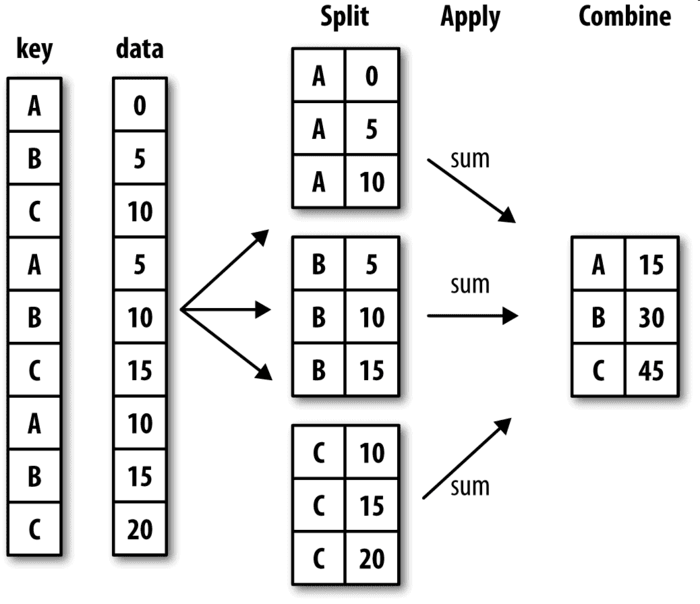

分组键可以有多种形式，且类型不必相同：
* 列表或数组，其长度与待分组的轴一样。
* 表示DataFrame某个列名的值。
* 字典或Series，给出待分组轴上的值与分组名之间的对应关系。
* 函数，用于处理轴索引或索引中的各个标签。<br>

**注意**，后三种都只是快捷方式而已，其最终目的仍然是产生一组用于拆分对象的值。

# A股整体概况数据分析

In [3]:
import tushare as ts
import pandas as  pd
import pyecharts as pe

In [5]:
stocks=ts.get_stock_basics()
stocks.iloc[:5,:10]

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved
code,,,,,,,,,,
601869,N长飞,元器件,湖北,19.59,0.76,7.58,965787.69,561101.50,189854.81,155202.56
000955,欣龙控股,纺织,海南,0.00,5.38,5.38,130058.56,66284.50,44417.80,49573.46
002195,二三四五,软件服务,上海,22.88,42.30,44.36,957737.19,540403.31,7009.65,272988.91
002580,圣阳股份,电气设备,山东,140.59,2.98,3.54,199927.50,139065.56,42368.53,53754.13
002608,江苏国信,火力发电,江苏,16.70,5.39,37.78,4652351.50,864956.13,2432949.75,1310714.00


* code,代码
* name,名称
* industry,所属行业
* area,地区
* pe,市盈率
* outstanding,流通股本(亿)
* totals,总股本(亿)
* totalAssets,总资产(万)
* liquidAssets,流动资产
* fixedAssets,固定资产
* reserved,公积金
* reservedPerShare,每股公积金
* esp,每股收益
* bvps,每股净资
* pb,市净率
* timeToMarket,上市日期
* undp,未分利润
* perundp, 每股未分配
* rev,收入同比(%)
* profit,利润同比(%)
* gpr,毛利率(%)
* npr,净利润率(%)
* holders,股东人数
# A股行业、地域、市盈率、流通股本

In [6]:
df=stocks.iloc[:,1:5]
df.head()

,industry,area,pe,outstanding
code,,,,
601869,元器件,湖北,19.59,0.76
000955,纺织,海南,0.00,5.38
002195,软件服务,上海,22.88,42.30
002580,电气设备,山东,140.59,2.98
002608,火力发电,江苏,16.70,5.39


eg.按照行业对A股所有股票的市盈率分组

In [7]:
grouped=df.pe.groupby(df.industry)
grouped

变量grouped是一个GroupBy对象。它实际上还没有进行任何计算，只是含有一些有关分组键《行业》的中间数据而已。换句话说，该对象已经有了接下来对各分组执行运算所需的一切信息。例如，我们可以调用GroupBy的mean方法来计算分组平均值：

In [8]:
grouped.mean().head()

industry
专用机械    121.122109
中成药      46.751733
乳制品      59.161818
互联网      60.499808
仓储物流     65.546571
Name: pe, dtype: float64

上面，数据（Series）根据分组键进行了聚合，产生了一个新的Series。<br>
如果我们一次传入多个数组的列表，就会得到不同的结果：

In [9]:
grouped=df.pe.groupby([df.industry,df.area])
grouped

In [10]:
grouped.mean().head()

industry  area
专用机械      上海      182.131000
          北京       67.731250
          四川       55.238571
          天津        0.000000
          安徽       37.238000
Name: pe, dtype: float64

这里，我通过两个键对数据进行了分组，得到的Series具有一个层次化索引（由唯一的键对组成）：

In [11]:
grouped.mean().unstack().head()

area,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
industry,,,,,,,,,,,,,,,,,,,,,
专用机械,182.131,NaN,NaN,67.731250,NaN,55.238571,0.00,NaN,37.238,34.862500,...,NaN,0.00,143.6725,NaN,NaN,191.73125,NaN,0.00,NaN,NaN
中成药,33.840,51.14,76.06,36.520000,28.508,112.100000,22.34,NaN,NaN,32.806667,...,47.372,69.77,56.4100,62.743333,32.2725,NaN,161.19,104.65,85.54,20.96
乳制品,11.365,NaN,19.93,58.180000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
互联网,46.272,NaN,NaN,89.756364,NaN,35.840000,NaN,NaN,14.870,24.626667,...,274.885,NaN,27.5625,NaN,NaN,13.01000,32.00,NaN,29.29,NaN
仓储物流,191.845,NaN,NaN,25.703333,NaN,13.085000,208.96,NaN,49.790,8.940000,...,NaN,NaN,11.7200,NaN,NaN,29.85000,NaN,NaN,NaN,22.09


通常，分组信息就位于相同的要处理DataFrame中。这里，你还可以将列名（可以是字符串、数字或其他Python对象）用作分组键：

In [12]:
df.groupby(['industry']).mean().head()

,pe,outstanding
industry,,
专用机械,121.122109,3.317656
中成药,46.751733,6.880533
乳制品,59.161818,10.132727
互联网,60.499808,6.817692
仓储物流,65.546571,5.957143


结果中没有"area"列，是因为该列不是数值数据，所以从结果中排除了。

In [13]:
df.groupby(['industry','area']).mean().head()

pe  outstanding
industry area                         
专用机械     上海    182.131000     1.278000
         北京     67.731250     5.713750
         四川     55.238571     3.778571
         天津      0.000000     2.750000
         安徽     37.238000     1.980000

GroupBy的size方法，它可以返回一个含有分组大小的Series：

In [14]:
df.groupby(['industry','area']).size().head()

industry  area
专用机械      上海      10
          北京       8
          四川       7
          天津       1
          安徽       5
dtype: int64

# 对分组进行迭代
GroupBy对象支持迭代，可以产生一组二元元组（由分组名和数据块组成）。

In [16]:
grouped=df.groupby(['area'])
xa=iter(grouped)
xb=next(xa)

In [19]:
xb[1].head()

,industry,area,pe,outstanding
code,,,,
002195,软件服务,上海,22.88,42.30
002184,软件服务,上海,0.00,1.36
603713,仓储物流,上海,29.76,0.38
603009,汽车配件,上海,31.44,3.21
300551,专用机械,上海,0.00,0.65


对于多重键的情况，元组的第一个元素将会是由键值组成的元组：

In [20]:
grouped=df.groupby(['area','industry'])
xa=iter(grouped)
xb=next(xa)

In [21]:
xb[0]

('上海', '专用机械')

In [22]:
ls=list(grouped)
ls[:2]

[(('上海', '专用机械'),        industry area      pe  outstanding
  code                                     
  300551     专用机械   上海    0.00         0.65
  603690     专用机械   上海  661.67         0.91
  300483     专用机械   上海   69.72         0.61
  603131     专用机械   上海  777.98         0.50
  603855     专用机械   上海   36.31         2.02
  603960     专用机械   上海   83.16         0.52
  603159     专用机械   上海   51.36         0.25
  300462     专用机械   上海   29.17         0.68
  603012     专用机械   上海   29.99         6.37
  603895     专用机械   上海   81.95         0.27),
 (('上海', '中成药'),        industry area     pe  outstanding
  code                                    
  600272      中成药   上海  58.76         1.60
  300039      中成药   上海  15.55         7.19
  600613      中成药   上海  27.21         4.79)]

In [26]:
dc=dict(ls)

# 选取一列或列的子集
对于由DataFrame产生的GroupBy对象，如果用一个（单个字符串）或一组（字符串数组）列名对其进行索引，就能实现选取部分列进行聚合的目的。

In [27]:
df.groupby('area')[['pe']]

In [28]:
df[['pe']].groupby(df.area)

In [29]:
df.groupby('area')['pe']

In [30]:
df['pe'].groupby(df.area)

计算行业、地域对应市盈率的平均值

In [31]:
df.groupby(['industry','area'])[['pe']].mean().head()

pe
industry area            
专用机械     上海    182.131000
         北京     67.731250
         四川     55.238571
         天津      0.000000
         安徽     37.238000

上面，这种索引操作所返回的对象是一个已分组的DataFrame（如果传入的是列表或数组）或已分组的Series（如果传入的是标量形式的单个列名）。<br>
# 通过函数进行分组
任何被当做分组键的函数都会在各个索引值上被调用一次，其返回值就会被用作分组名称。

In [32]:
df.groupby(lambda x:int(x)%10).count()

,industry,area,pe,outstanding
0,362,362,362,362
1,344,344,344,344
2,309,309,309,309
3,351,351,351,351
4,199,199,199,199
5,345,345,345,345
6,401,401,401,401
7,361,361,361,361
8,455,455,455,455
9,409,409,409,409


In [33]:
"hello".startswith('h')

True

In [34]:
def f(x):
    return '上海' if x.startswith('6') else '深圳'
f('600000')

'上海'

In [37]:
df.groupby([f,'industry']).count().head()

area  pe  outstanding
   industry                       
上海 专用机械        47  47           47
   中成药         32  32           32
   乳制品          5   5            5
   互联网         10  10           10
   仓储物流        21  21           21

# 数据聚合
聚合指的是任何能够从数组产生标量值的数据转换过程。之前的例子已经用过一些，比如mean、count、min以及sum等。
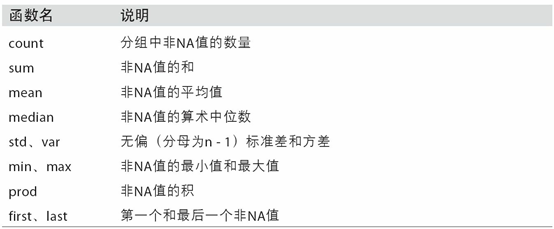
你可以使用自己发明的聚合运算，还可以调用分组对象上已经定义好的任何方法。例如，quantile可以计算Series或DataFrame列的样本分位数。<br>
虽然quantile并没有明确地实现于GroupBy，但它是一个Series方法，所以这里是能用的。

In [39]:
df.groupby('area')[['pe']].quantile(0.5).head()

0.5,pe
area,
上海,31.52
云南,33.54
内蒙,26.33
北京,33.03
吉林,28.52


如果要使用你自己的聚合函数，只需将其传入aggregate或agg方法即可：

In [40]:
df.groupby('area')[['outstanding']].agg(lambda x:x.max()-x.min()).head()

,outstanding
area,
上海,392.51
云南,64.46
内蒙,315.07
北京,2940.38
吉林,31.50


# 面向列的多函数应用
对不同的列使用不同的聚合函数，或一次应用多个函数。<br>
通过自定义函数调用聚合函数的名字，运行聚合运算。

In [41]:
df.groupby(['area','industry'])[['pe','outstanding']].agg("mean").head()

pe  outstanding
area industry                      
上海   专用机械      182.131     1.278000
     中成药        33.840     4.526667
     乳制品        11.365     8.135000
     互联网        46.272    11.534000
     仓储物流      191.845     2.541667

如果传入一组函数或函数名，得到的DataFrame的列就会以相应的函数命名：

In [42]:
df.groupby(['area','industry'])[['pe','outstanding']].agg(["mean",'std']).head()

pe             outstanding           
                  mean         std        mean        std
area industry                                            
上海   专用机械      182.131  285.879127    1.278000   1.857877
     中成药        33.840   22.354948    4.526667   2.804288
     乳制品        11.365   16.072537    8.135000   5.805347
     互联网        46.272   48.200422   11.534000  17.064092
     仓储物流      191.845  371.388803    2.541667   3.576777

In [43]:
df.groupby(['area','industry'])[['pe','outstanding']].agg(["mean",lambda x:x.max()-x.min()]).head()

pe          outstanding         
                  mean <lambda>        mean <lambda>
area industry                                       
上海   专用机械      182.131   777.98    1.278000     6.12
     中成药        33.840    43.21    4.526667     5.59
     乳制品        11.365    22.73    8.135000     8.21
     互联网        46.272   122.22   11.534000    41.00
     仓储物流      191.845   930.73    2.541667     9.22

你并非一定要接受GroupBy自动给出的那些列名，特别是lambda函数，它们的名称是'<lambda>'，这样的辨识度就很低了。<br>
因此，如果传入的是一个由(name,function)元组组成的列表，则各元组的第一个元素就会被用作DataFrame的列名（可以将这种二元元组列表看做一个有序映射）：

In [44]:
df.groupby(['area','industry'])[['pe','outstanding']].agg([('平均值',"mean"),('离散度',lambda x:x.max()-x.min())]).head()

pe         outstanding       
                   平均值     离散度         平均值    离散度
area industry                                    
上海   专用机械      182.131  777.98    1.278000   6.12
     中成药        33.840   43.21    4.526667   5.59
     乳制品        11.365   22.73    8.135000   8.21
     互联网        46.272  122.22   11.534000  41.00
     仓储物流      191.845  930.73    2.541667   9.22

如你所见，结果DataFrame拥有层次化的列，这相当于分别对各列进行聚合，然后用concat将结果组装到一起。<br>
现在，假设你想要对一个列或不同的列应用不同的函数。具体的办法是向agg传入一个从列名映射到函数的字典：

In [47]:
df.groupby(['area','industry'])[['pe','outstanding']]. \
agg({'pe':[('平均值','mean'),('最大值',max)],'outstanding':[('离散度',lambda x:x.max()-x.min())]}).head()

pe         outstanding
                   平均值     最大值         离散度
area industry                             
上海   专用机械      182.131  777.98        6.12
     中成药        33.840   58.76        5.59
     乳制品        11.365   22.73        8.21
     互联网        46.272  122.22       41.00
     仓储物流      191.845  949.04        9.22

# 以“没有行索引”的形式返回聚合数据
到目前为止，所有示例中的聚合数据都有由唯一的分组键组成的索引（可能还是层次化的）。由于并不总是需要如此，所以你可以向groupby传入as_index=False以禁用该功能：

In [48]:
df.groupby(['area','industry'],as_index=False)[['pe','outstanding']]. \
agg({'pe':[('平均值','mean'),('最大值',max)],'outstanding':[('离散度',lambda x:x.max()-x.min())]}).head()

area industry       pe         outstanding
                     平均值     最大值         离散度
0   上海     专用机械  182.131  777.98        6.12
1   上海      中成药   33.840   58.76        5.59
2   上海      乳制品   11.365   22.73        8.21
3   上海      互联网   46.272  122.22       41.00
4   上海     仓储物流  191.845  949.04        9.22

当然，对结果调用reset_index也能得到这种形式的结果。使用as_index=False方法可以避免一些不必要的计算。

In [49]:
df.groupby(['area','industry'])[['pe','outstanding']]. \
agg({'pe':[('平均值','mean'),('最大值',max)],'outstanding':[('离散度',lambda x:x.max()-x.min())]}).reset_index().head()

area industry       pe         outstanding
                     平均值     最大值         离散度
0   上海     专用机械  182.131  777.98        6.12
1   上海      中成药   33.840   58.76        5.59
2   上海      乳制品   11.365   22.73        8.21
3   上海      互联网   46.272  122.22       41.00
4   上海     仓储物流  191.845  949.04        9.22

# apply：一般性的“拆分－应用－合并”
最通用的GroupBy方法是apply,apply会将待处理的对象拆分成多个片段，然后对各片段调用传入的函数，最后尝试将各片段组合到一起。

In [50]:
df.groupby('area').apply(lambda x:x.sort_values(by='pe')[-3:]).head(11)

industry area       pe  outstanding
area code                                      
上海   600732     区域地产   上海  1454.96         4.46
     603918     软件服务   上海  2235.35         1.77
     600610     建筑施工   上海  3016.25         3.76
云南   300142     生物制药   云南   340.06        13.50
     002428      小金属   云南   716.34         6.44
     601099       证券   云南   759.17        64.79
内蒙   300355     环境保护   内蒙   122.18        11.58
     600262     汽车整车   内蒙   138.95         1.70
     600863     火力发电   内蒙   694.07        58.08
北京   600764     通信设备   北京  1069.30         3.30
     300352     软件服务   北京  1209.67        10.44

函数在DataFrame的各个片段上调用，然后结果由pandas.concat组装到一起，并以分组名称进行了标记。于是，最终结果就有了一个层次化索引，其内层索引值来自原DataFrame。<br>
如果传给apply的函数能够接受其他参数或关键字，则可以将这些内容放在函数名后面一并传入：

In [51]:
def f(x,field='pe',n=3):
    return x.sort_values(by=field)[-n:]

In [52]:
df.groupby('area').apply(f,field='outstanding',n=2).head(11)

industry area      pe  outstanding
area code                                     
上海   600000       银行   上海    5.06       281.04
     601328       银行   上海    5.21       392.51
云南   600497       铅锌   云南   15.71        43.10
     601099       证券   云南  759.17        64.79
内蒙   601216     化工原料   内蒙    8.81        84.38
     600010       普钢   内蒙   27.73       316.77
北京   601398       银行   北京    6.18      2696.12
     601288       银行   北京    5.27      2940.55
吉林   601929     影视音像   吉林   46.14        31.11
     600881       水泥   吉林    0.00        32.23
四川   000629      小金属   四川    0.00        47.67

In [53]:
df.describe()

,pe,outstanding
count,3536.000000,3536.000000
mean,85.620803,13.470546
std,297.688646,85.736708
min,0.000000,0.000000
25%,14.685000,1.790000
50%,31.820000,4.500000
75%,67.190000,9.565000
max,10609.500000,2940.550000


In [54]:
df.groupby('area').describe().head()

outstanding                                                             \
           count       mean         std   min    25%    50%    75%      max   
area                                                                          
上海         283.0  14.369293   37.735218  0.00  1.575   4.61   9.62   392.51   
云南          33.0  11.038182   13.198717  0.33  3.030   6.76  13.50    64.79   
内蒙          25.0  30.212000   63.247214  1.70  4.850  11.37  26.74   316.77   
北京         310.0  57.010032  279.222247  0.17  2.540   5.77  14.81  2940.55   
吉林          41.0   9.376829    8.305006  0.73  3.360   6.70  12.13    32.23   

         pe                                                                 
      count        mean         std  min      25%    50%      75%      max  
area                                                                        
上海    283.0   91.653746  276.708323  0.0  14.4600  31.52   64.160  3016.25  
云南     33.0  103.613030  181.767848  0.0   9.9200  33.54  100.510   759.17  
内蒙     25.0   63.537600  137.184649  0.0   9.2300  26.33   73.420   694.07  
北京    310.0   95.557581  181.475243  0.0  12.5225  33.03   93.005  1318.61  
吉林     41.0  100.873415  245.862436  0.0  14.2600  28.52   57.890  1383.56

In [56]:
df.groupby('area').apply(lambda x:x.describe()).head(11)

pe  outstanding
area                                
上海   count   283.000000   283.000000
     mean     91.653746    14.369293
     std     276.708323    37.735218
     min       0.000000     0.000000
     25%      14.460000     1.575000
     50%      31.520000     4.610000
     75%      64.160000     9.620000
     max    3016.250000   392.510000
云南   count    33.000000    33.000000
     mean    103.613030    11.038182
     std     181.767848    13.198717

In [58]:
df.groupby('area').apply(lambda x:x.describe()).unstack().head()

pe                                                                 \
      count        mean         std  min      25%    50%      75%      max   
area                                                                         
上海    283.0   91.653746  276.708323  0.0  14.4600  31.52   64.160  3016.25   
云南     33.0  103.613030  181.767848  0.0   9.9200  33.54  100.510   759.17   
内蒙     25.0   63.537600  137.184649  0.0   9.2300  26.33   73.420   694.07   
北京    310.0   95.557581  181.475243  0.0  12.5225  33.03   93.005  1318.61   
吉林     41.0  100.873415  245.862436  0.0  14.2600  28.52   57.890  1383.56   

     outstanding                                                             
           count       mean         std   min    25%    50%    75%      max  
area                                                                         
上海         283.0  14.369293   37.735218  0.00  1.575   4.61   9.62   392.51  
云南          33.0  11.038182   13.198717  0.33  3.030   6.76  13.50    64.79  
内蒙          25.0  30.212000   63.247214  1.70  4.850  11.37  26.74   316.77  
北京         310.0  57.010032  279.222247  0.17  2.540   5.77  14.81  2940.55  
吉林          41.0   9.376829    8.305006  0.73  3.360   6.70  12.13    32.23

# 禁止分组键
从上面的例子中可以看出，分组键会跟原始对象的索引共同构成结果对象中的层次化索引。将group_keys=False传入groupby即可禁止该效果：

In [61]:
df.groupby(['area'],group_keys=False).apply(lambda x:x.describe()).head()

,pe,outstanding
count,283.000000,283.000000
mean,91.653746,14.369293
std,276.708323,37.735218
min,0.000000,0.000000
25%,14.460000,1.575000


# 透视表和交叉表
透视表（pivot table）是各种电子表格程序和其他数据分析软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中。<br>
**注意：**计算分组平均数（pivot_table的默认聚合类型）

In [66]:
df.pivot_table(values=['pe'],index=['area'],columns=['industry']).head()

pe                                                            \
industry       专用机械     中成药     乳制品        互联网        仓储物流       供气供热      保险   
area                                                                            
上海        182.13100  33.840  11.365  46.272000  191.845000  99.760000  20.630   
云南              NaN  51.140     NaN        NaN         NaN        NaN     NaN   
内蒙              NaN  76.060  19.930        NaN         NaN        NaN  17.380   
北京         67.73125  36.520  58.180  89.756364   25.703333   8.400000  13.605   
吉林              NaN  28.508     NaN        NaN         NaN  10.056667     NaN   

                                         ...                              \
industry         元器件       全国地产    公共交通  ...       钢加工  铁路     铅锌      铜   
area                                     ...                               
上海         32.243333  10.004000  37.302  ...      0.00 NaN    NaN  53.09   
云南               NaN   0.000000     NaN  ...       NaN NaN  51.85  27.54   
内蒙               NaN        NaN     NaN  ...       NaN NaN  33.87    NaN   
北京        104.880000  42.138333  51.260  ...    159.08 NaN  25.60    NaN   
吉林               NaN        NaN     NaN  ...       NaN NaN    NaN    NaN   

                                                      
industry      铝        银行  陶瓷      食品      饲料     黄金  
area                                                  
上海          NaN  5.610000 NaN  17.305     NaN    NaN  
云南         0.00       NaN NaN  31.430     NaN    NaN  
内蒙          NaN       NaN NaN   0.000     NaN  56.50  
北京        42.25  5.437778 NaN     NaN  20.475  99.46  
吉林        17.24       NaN NaN     NaN     NaN    NaN  

[5 rows x 110 columns]

In [72]:
df.pivot_table(values=['pe'],index=['area'],columns=['industry'],aggfunc="mean",margins=True,fill_value=0).head()

pe                                                            \
industry       专用机械     中成药     乳制品        互联网        仓储物流       供气供热      保险   
area                                                                            
上海        182.13100  33.840  11.365  46.272000  191.845000  99.760000  20.630   
云南          0.00000  51.140   0.000   0.000000    0.000000   0.000000   0.000   
内蒙          0.00000  76.060  19.930   0.000000    0.000000   0.000000  17.380   
北京         67.73125  36.520  58.180  89.756364   25.703333   8.400000  13.605   
吉林          0.00000  28.508   0.000   0.000000    0.000000  10.056667   0.000   

                                            ...                                \
industry         元器件       全国地产    公共交通     ...       铁路     铅锌      铜      铝   
area                                        ...                                 
上海         32.243333  10.004000  37.302     ...      0.0   0.00  53.09   0.00   
云南          0.000000   0.000000   0.000     ...      0.0  51.85  27.54   0.00   
内蒙          0.000000   0.000000   0.000     ...      0.0  33.87   0.00   0.00   
北京        104.880000  42.138333  51.260     ...      0.0  25.60   0.00  42.25   
吉林          0.000000   0.000000   0.000     ...      0.0   0.00   0.00  17.24   

                                                            
industry        银行   陶瓷      食品      饲料     黄金         All  
area                                                        
上海        5.610000  0.0  17.305   0.000   0.00   91.653746  
云南        0.000000  0.0  31.430   0.000   0.00  103.613030  
内蒙        0.000000  0.0   0.000   0.000  56.50   63.537600  
北京        5.437778  0.0   0.000  20.475  99.46   95.557581  
吉林        0.000000  0.0   0.000   0.000   0.00  100.873415  

[5 rows x 111 columns]

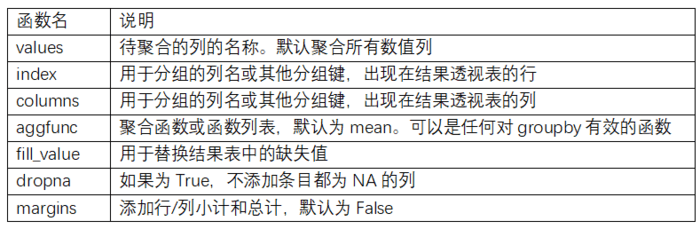

# 交叉表：crosstab
交叉表（cross-tabulation，简称crosstab）是一种用于计算分组频率的特殊透视表。

In [73]:
pd.crosstab(index=df.area,columns=df.industry,margins=True)

industry,专用机械,中成药,乳制品,互联网,仓储物流,供气供热,保险,元器件,全国地产,公共交通,...,铁路,铅锌,铜,铝,银行,陶瓷,食品,饲料,黄金,All
area,,,,,,,,,,,,,,,,,,,,,
上海,10,3,2,5,6,1,1,3,5,5,...,0,0,1,0,3,0,4,0,0,283
云南,0,3,0,0,0,0,0,0,1,0,...,0,2,1,1,0,0,1,0,0,33
内蒙,0,1,1,0,0,0,1,0,0,0,...,0,2,0,0,0,0,1,0,1,25
北京,8,2,1,11,3,1,2,6,6,1,...,0,2,0,1,9,0,0,2,1,310
吉林,0,5,0,0,0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,41
四川,7,2,0,1,2,1,0,3,0,0,...,0,1,0,0,1,0,1,2,0,119
天津,1,3,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,50
宁夏,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
安徽,5,0,0,1,1,1,0,3,0,0,...,0,0,4,0,0,0,1,0,0,105
